In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 5.1

In [2]:
data = pd.read_csv('week2.csv')
data.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,vwap,Day_Perc_Change,Trend
0,0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,...,336356,2.286158e+09,31377,154743,46.01,5,2017,6796.840000,0.000000,Slight or No change
1,1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,...,707624,4.884174e+09,49047,360641,50.97,5,2017,6868.268013,1.905802,Positive
2,2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,...,445461,3.087758e+09,65280,260033,58.37,5,2017,6887.209301,0.061116,Slight or No change
3,3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,...,406814,2.794684e+09,37063,188907,46.44,5,2017,6883.448643,-1.827340,Negative
4,4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,...,552223,3.750475e+09,64293,234662,42.49,5,2017,6862.733353,-0.592881,Slight negative


In [3]:
mean_daily_return = np.mean(data['Day_Perc_Change'])

std_daily_return = np.std(data['Day_Perc_Change'])

annual_return = mean_daily_return * 252
volatility = std_daily_return * np.sqrt(252)
print(f'The daily return of this stock on an average is: {mean_daily_return}')
print(f'The standard deviation of daily return of this stock is: {std_daily_return}')
print(f'The annual return of this stock is: {annual_return}')
print(f'The Volatility of this stock is: {volatility}')

The daily return of this stock on an average is: 0.0015590385872745838
The standard deviation of daily return of this stock is: 1.4173824829790356
The annual return of this stock is: 0.3928777239931951
The Volatility of this stock is: 22.50024937573061


## 5.2

In [4]:
data1 = pd.read_csv('./Mid_Cap/EXIDEIND.csv')
#data1.head()
data2 = pd.read_csv('./Mid_Cap/APOLLOTYRE.csv')
print(data1.shape)
print(data2.shape)

(494, 15)
(494, 15)


In [5]:
data3 = pd.read_csv('./Large_Cap/AXISBANK.csv')
data4 = pd.read_csv('./Large_Cap/HINDALCO.csv')
data5 = pd.read_csv('./Large_Cap/GAIL.csv')
print(data3.shape)
print(data4.shape)
print(data5.shape)

(495, 15)
(495, 15)
(494, 15)


In [6]:
## dropping rows other than EQ
data1 = data1.where(data1.Series=='EQ')
data2 = data2.where(data2.Series=='EQ')
data3 = data3.where(data3.Series=='EQ')
data4 = data4.where(data4.Series=='EQ')
data5 = data5.where(data5.Series=='EQ')

In [7]:
portfolio = pd.DataFrame()
portfolio['Stock 1'],portfolio['Stock 2'],portfolio['Stock 3'],portfolio['Stock 4'],portfolio['Stock 5'] = data1['Close Price'],data2['Close Price'],data3['Close Price'],data4['Close Price'],data5['Close Price']
print(portfolio.shape)

(494, 5)


In [8]:
portfolio.head()

,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5
0,245.80,231.90,500.1,198.45,414.00
1,244.70,234.40,501.5,196.50,411.40
2,243.20,237.35,502.8,198.85,408.30
3,239.85,232.65,492.0,194.00,404.75
4,238.15,234.65,501.7,191.00,401.05


In [9]:
portfolio['Daily Return Stock 1 %'] = portfolio['Stock 1'].pct_change() * 100
portfolio['Daily Return Stock 2 %'] = portfolio['Stock 2'].pct_change() * 100
portfolio['Daily Return Stock 3 %'] = portfolio['Stock 3'].pct_change() * 100
portfolio['Daily Return Stock 4 %'] = portfolio['Stock 4'].pct_change() * 100
portfolio['Daily Return Stock 5 %'] = portfolio['Stock 5'].pct_change() * 100

In [10]:
portfolio.fillna(0,inplace=True)
portfolio.head()

,Stock 1,Stock 2,Stock 3,Stock 4,Stock 5,Daily Return Stock 1 %,Daily Return Stock 2 %,Daily Return Stock 3 %,Daily Return Stock 4 %,Daily Return Stock 5 %
0,245.80,231.90,500.1,198.45,414.00,0.000000,0.000000,0.000000,0.000000,0.000000
1,244.70,234.40,501.5,196.50,411.40,-0.447518,1.078051,0.279944,-0.982615,-0.628019
2,243.20,237.35,502.8,198.85,408.30,-0.612996,1.258532,0.259222,1.195929,-0.753525
3,239.85,232.65,492.0,194.00,404.75,-1.377467,-1.980198,-2.147971,-2.439024,-0.869459
4,238.15,234.65,501.7,191.00,401.05,-0.708776,0.859660,1.971545,-1.546392,-0.914145


In [11]:
annual_returns = {}
for i in range(1,6):
    annual_returns['annual_mean_return_' + str(i)] = np.mean(portfolio[f'Daily Return Stock {str(i)} %'])

In [12]:
print(annual_returns.values())

dict_values([-0.020388804515698866, -0.025465255618533803, 0.09316251816348649, 0.01966709343704466, -0.020811319431694904])


In [13]:
total_port_annual_return = np.mean(list(annual_returns.values()))*252
print(f'The total annual return of portfolio is: {total_port_annual_return} %')

The total annual return of portfolio is: 2.3266772945440204 %


### Calculating Volatility

In [14]:
annual_std = {}
for i in range(1,6):
    annual_std['annual_std_' + str(i)] = np.std(portfolio[f'Daily Return Stock {str(i)} %']) * np.sqrt(252)

In [15]:
annual_std.values()

dict_values([26.245227216270454, 30.98155598542862, 27.733332446145766, 33.580931163169325, 33.773895228746156])

In [16]:
annual_variance = []
for i in annual_std.keys():
    annual_variance.append(annual_std[i]**2)

In [17]:
annual_variance

[688.8119516336634,
 959.856811278248,
 769.1377285684415,
 1127.6789377855166,
 1140.6759989223224]

In [18]:
### Getting Covariance now

cov = portfolio.iloc[:,5:].cov()
cov

,Daily Return Stock 1 %,Daily Return Stock 2 %,Daily Return Stock 3 %,Daily Return Stock 4 %,Daily Return Stock 5 %
Daily Return Stock 1 %,2.738925,1.262564,0.629481,0.748506,0.842928
Daily Return Stock 2 %,1.262564,3.816682,0.779906,0.670469,0.685648
Daily Return Stock 3 %,0.629481,0.779906,3.058325,0.738138,0.275376
Daily Return Stock 4 %,0.748506,0.670469,0.738138,4.483993,0.374756
Daily Return Stock 5 %,0.842928,0.685648,0.275376,0.374756,4.535674


In [19]:
cov_arr = np.array(cov)
cov_arr

array([[2.73892514, 1.26256371, 0.62948074, 0.74850627, 0.84292763],
       [1.26256371, 3.81668168, 0.77990576, 0.67046859, 0.68564767],
       [0.62948074, 0.77990576, 3.05832478, 0.73813792, 0.27537637],
       [0.74850627, 0.67046859, 0.73813792, 4.48399333, 0.3747565 ],
       [0.84292763, 0.68564767, 0.27537637, 0.3747565 , 4.53567358]])

In [20]:
cov_dict = {}
for i in range(0,5):
    for j in range(i+1,5):
        cov_dict[str(i) + '-' + str(j)] = cov_arr[i][j]

In [21]:
cov_dict

{'0-1': 1.262563706309035,
 '0-2': 0.6294807374552787,
 '0-3': 0.7485062733290422,
 '0-4': 0.8429276275882056,
 '1-2': 0.7799057582827755,
 '1-3': 0.6704685869347778,
 '1-4': 0.6856476704482576,
 '2-3': 0.7381379151358224,
 '2-4': 0.2753763747743198,
 '3-4': 0.37475649652995685}

In [22]:
sum_cov = 0
for value in cov_dict.values():
    sum_cov += value
sum_cov

7.007771146787471

In [23]:
weight = 0.2
vol_sum = 0
for i in range(5):
    vol_sum += (weight ** 2) * (annual_variance[i])

volatility_port = vol_sum + (2 * (weight**2) * sum_cov) 
volatility_port = np.sqrt(volatility_port)

In [24]:
print(f'The Total Annual Return of this Portfolio is: {np.round(total_port_annual_return,3)} %\nThe Total Volatility for this Portfolio is: {np.round(volatility_port,3)} %')

The Total Annual Return of this Portfolio is: 2.327 %
The Total Volatility for this Portfolio is: 13.712 %


## 5.3

In [25]:
varying_portfolio = portfolio.iloc[:,5:]
varying_portfolio.head()

,Daily Return Stock 1 %,Daily Return Stock 2 %,Daily Return Stock 3 %,Daily Return Stock 4 %,Daily Return Stock 5 %
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.447518,1.078051,0.279944,-0.982615,-0.628019
2,-0.612996,1.258532,0.259222,1.195929,-0.753525
3,-1.377467,-1.980198,-2.147971,-2.439024,-0.869459
4,-0.708776,0.859660,1.971545,-1.546392,-0.914145


In [26]:
np.array(varying_portfolio)

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.44751831,  1.07805088,  0.27994401, -0.98261527, -0.62801932],
       [-0.6129955 ,  1.25853242,  0.25922233,  1.19592875, -0.75352455],
       ...,
       [ 0.69594432, -3.36375489, -0.85596819, -0.22449489,  0.85925926],
       [ 0.19065777,  3.04910955, -0.61182869, -0.925     ,  0.33783784],
       [-1.14176974, -2.48756219,  0.55403557, -1.18597022, -2.78143756]])

In [27]:
s = np.array(np.random.rand(494,5))
for i in range(len(s)):
    s[i] = s[i] * (1/np.sum(s[i]))
np.sum(s,axis=1)
s = pd.DataFrame(s)
s.head()

,0,1,2,3,4
0,0.053994,0.502891,0.026112,0.378583,0.038420
1,0.249188,0.277993,0.078255,0.062127,0.332437
2,0.227425,0.417465,0.095060,0.044928,0.215122
3,0.245584,0.217402,0.122270,0.121424,0.293320
4,0.352272,0.052284,0.307942,0.240740,0.046762


In [28]:
s['Expected Return'] = 1.0
s['Volatility'] = 1.0
s['Sharpe'] = 1.0
for i in s.index:
    s['Expected Return'][i] = np.mean(np.dot(np.array(varying_portfolio),(np.array(s.ix[i,:-3])))) * 252
    s['Volatility'][i] = np.std(np.dot(np.array(varying_portfolio),(np.array(s.ix[i,:-3])))) * np.sqrt(252)
    s['Sharpe'][i] = s['Expected Return'][i]/s['Volatility'][i]
s.head()

/home/vibe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/home/vibe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,0,1,2,3,4,Expected Return,Volatility,Sharpe
0,0.053994,0.502891,0.026112,0.378583,0.038420,-1.216742,22.746923,-0.053490
1,0.249188,0.277993,0.078255,0.062127,0.332437,-2.662634,19.967949,-0.133345
2,0.227425,0.417465,0.095060,0.044928,0.215122,-2.521282,20.389993,-0.123653
3,0.245584,0.217402,0.122270,0.121424,0.293320,-0.722910,18.890967,-0.038267
4,0.352272,0.052284,0.307942,0.240740,0.046762,6.031962,18.891453,0.319296


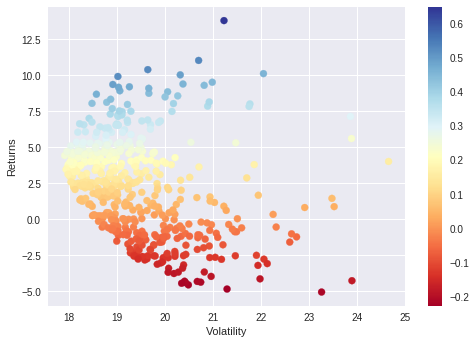

In [29]:
import matplotlib.colors
my_cmap = 'RdYlBu'

plt.style.use('seaborn')
x,y,z = s['Volatility'],s['Expected Return'],s.Sharpe
plt.scatter(x,y,c=z,cmap = my_cmap)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.show()

## 5.4

In [30]:
min_vol_idx = s.Volatility.idxmin()
max_shape_idx = s.Sharpe.idxmax()

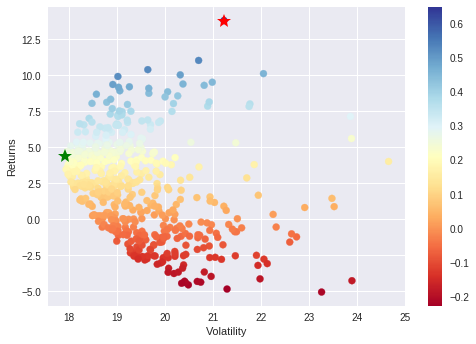

In [31]:
plt.scatter(x,y,c=z,cmap = my_cmap)
plt.plot(x[min_vol_idx],y[min_vol_idx],'g*',markersize = 15)
plt.plot(x[max_shape_idx],y[max_shape_idx],'r*',markersize = 15)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.show()